<a href="https://colab.research.google.com/github/Kaivan-Khazeni/WaterQualityModel/blob/main/Water_Quality_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaivan Khazeni**

May 2nd, 2022

Dataset : Water Potability (via [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability?select=water_potability.csv))

Goal: Determine if water is drinkable given other metrics. 0 and 1 indicate drinkable vs. not drinkable.



The goal of this module is to implement models and compare accuracy results. Also, run parameter tuning to enhance model scores.

The data set as a target domain of {0,1} meaning a binary classification. 

Models of choice:


1.   KNN - K Nearest Neighbors Classification Model
2.   Naive Bayes Classifcation Model
3.   Logistic Regression
4.   RandomForest
5.   XGBoost

Proper data processing will be done prior to model implementation.

#Packages and Imports

In [1]:
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns


import numpy as np
import statsmodels.formula.api as smf
import seaborn as sb


import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Retrieval and Processing

The data was found via Kaggle, however in order for others to run this colab file, I uploaded to Google spreadsheet and now am reading that public spreadsheet. Please click on ss_link to view original file:

In [2]:
ss_link = "https://docs.google.com/spreadsheets/d/1h5L6sYQb5aw_rLSQaRamdKH94wtLkeDxGaQeTn4Cp6A/edit#gid=1338418011"
new_link = "https://docs.google.com/spreadsheets/d/1h5L6sYQb5aw_rLSQaRamdKH94wtLkeDxGaQeTn4Cp6A/export?format=csv&gid=1338418011"

In [3]:
df = pd.read_csv(new_link)
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Right away, we see NaN values, meaning an entry/row had missing data for that individual report of sample.

The columns are all float types, except for the target variable , 'Potability'

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [5]:
df.shape

(3276, 10)

In [6]:
#Check for missing data
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In regards to missing data, the approaches vary. Considering the size of the data set (3276 entries), removing a mass amount of 781 entries (in regards to the Sulfate column) could have an adverse effect in our accuracy of our model.

To fill these column values, I will fill with the median of the column values. The reason for median over mean or mode is that if there is noise in the data, such as outliers, we want to avoid those impacting our model as much as possible.

In [7]:
df['ph'].fillna((df['ph'].median()), inplace=True)
df['Sulfate'].fillna((df['Sulfate'].median()), inplace=True)
df['Trihalomethanes'].fillna((df['Trihalomethanes'].median()), inplace=True)

In [8]:
#Check for missing data
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


At this point, all missing data is filled with medians of their respective columns 

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Visualizing Distribution of Columns

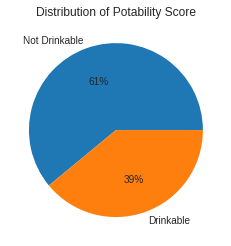

In [10]:
x = [len(df[df['Potability']==0]),len(df[df['Potability']==1])]
labels = ['Not Drinkable', 'Drinkable']

fig, ax = plt.subplots()
ax.pie(x, labels = labels,autopct='%.0f%%')
ax.set_title('Distribution of Potability Score')
plt.show()

We see that the split is roughly 60-40 in favor of 0 (non potable). This is not drastic however if needed, we can oversample the drinkable entries, or remove at random the non-drinkable entries to get a 50-50 split

Next up, we want to visualize the distributions of the other metrics we will be using in our model, or observe normality or lack there of.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


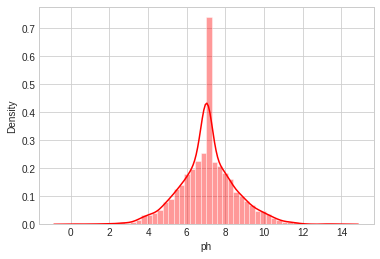

In [11]:
#PH
sns.distplot(a=df['ph'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


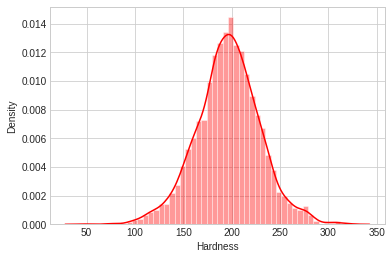

In [12]:
#Hardness
sns.distplot(a=df['Hardness'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


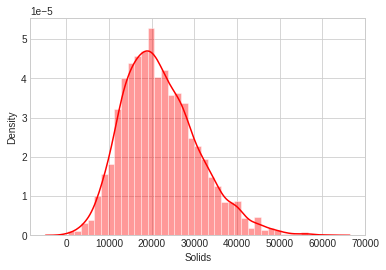

In [13]:
#Solids
sns.distplot(a=df['Solids'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


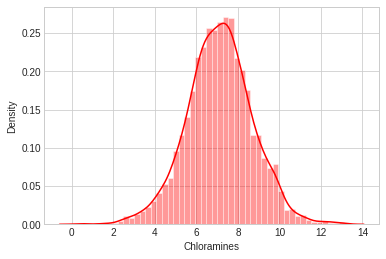

In [14]:
#Chloramines
sns.distplot(a=df['Chloramines'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


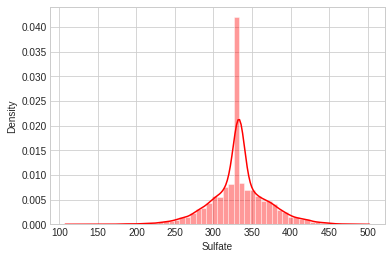

In [15]:
#Sulfate
sns.distplot(a=df['Sulfate'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


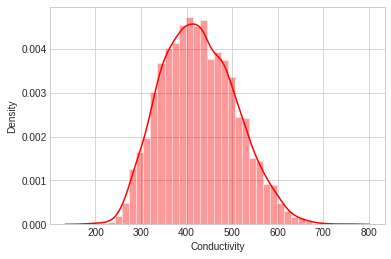

In [16]:
#Conductivity
sns.distplot(a=df['Conductivity'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


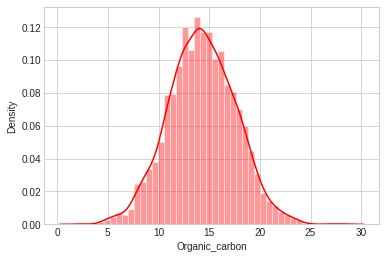

In [17]:
#Organic Carbon
sns.distplot(a=df['Organic_carbon'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


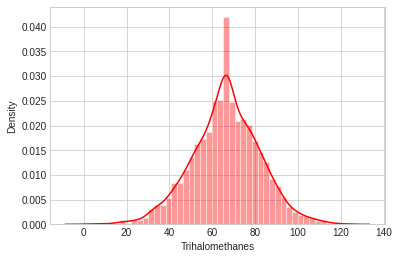

In [18]:
#Trihalomethans
sns.distplot(a=df['Trihalomethanes'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


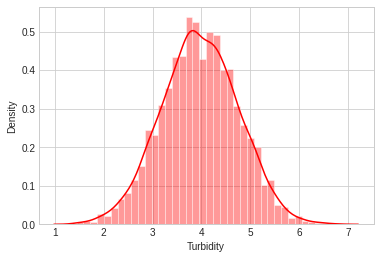

In [19]:
#Turbidity
sns.distplot(a=df['Turbidity'], color='red',
             hist_kws={"edgecolor": 'white'})
 
plt.show()

We do see that all the distrbutions had a normal bell curve, and it is safe to assume this throughout the model testing phase.

If we do notice more medians, we did replace NaN values with median therefore this is an expected trend in the distrbution graphs.

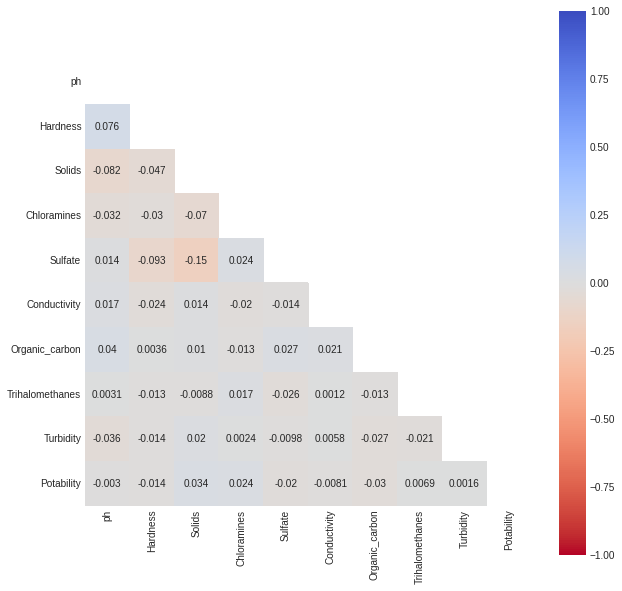

In [21]:
df_corr =  df[df.columns].corr()

df_mask = np.zeros_like(df_corr) #array of zeros of the same shape
df_mask[np.triu_indices_from(df_mask)] = True #turn upper triangle into ones

f,ax = plt.subplots(1,1,figsize=(10,10))

sb.heatmap(df_corr,vmin=-1,vmax=1,mask=df_mask,annot=True,square=True,ax=ax,cmap='coolwarm_r')

There also seems to be no true correlation between variables. Usually, if there are relationships, this could help model implementation, however it appears that there is not. 

# Model Experimentation

As stated previously, we are dealing with a classification problem, meaning the predicted values will be placed into a 0 or 1 class (non potable versus potable).



## Splitting Data Into Train and Test Splits

In [22]:
import random
df = df.sample(frac=1)

In [23]:
#Create X and y dataframes then create a split 
y = df['Potability']
X = df[['ph','Hardness','Solids','Chloramines','Sulfate', 'Conductivity', 'Organic_carbon',
       'Trihalomethanes','Turbidity']]



#Splitting data : Rule of thumb is 30 percent of data is testing data.
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                     test_size = .3,
                                                     random_state = 21)

There are many ways to experiment with testing models. In this situations I will perform a rapid test of the select models, and pick the top 2 to perform hyperparameter tuning on. Since the models with lower accuracy will already be behind, hyperparameter tuning would not change the results of the top ranked performing models.

## Rapid Model Examination

In [24]:
models =[("KNN", KNeighborsClassifier(n_neighbors=3)),
         ("GNB", GaussianNB()),
        ("LogReg", LogisticRegression()),
         ('RF',RandomForestClassifier()),
        ('XGB',GradientBoostingClassifier())]

In [25]:
def rapid_model_standard(models, X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  results = []
  model_type = []
  accuracy = []

  for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    model_type.append(name)
    accuracy.append((name,score))
    
  accuracy.sort(key=lambda k:k[1],reverse=True)
  print("With Standardization of Train and Test sets")
  for (name,score) in accuracy:
    print(str(name) + ": " + str(score))

In [26]:
def rapid_model_without_scale(models, X_train, X_test, y_train, y_test):
  results = []
  model_type = []
  accuracy = []

  for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    model_type.append(name)
    accuracy.append((name,score))
    
  accuracy.sort(key=lambda k:k[1],reverse=True)
  print("Without Standardization of Train and Test sets")
  for (name,score) in accuracy:
    print(str(name) + ": " + str(score))
  

In [27]:
rapid_model_standard(models,X_train.copy(),X_test.copy(),y_train.copy(),y_test.copy())
print("\n")
rapid_model_without_scale(models,X_train,X_test,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With Standardization of Train and Test sets
RF: 0.691428175891666
XGB: 0.6590278423712523
KNN: 0.585531205382464
GNB: 0.5751051950153747
LogReg: 0.30366225839267547




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Without Standardization of Train and Test sets
LogReg: 0.8039714867617108
XGB: 0.6590278423712523
RF: 0.6480541455160744
GNB: 0.5770961494645706
KNN: 0.5076542175798187


As seen, the results differ based off of Standardizing the datasets. In research, it has been proven, and backed by results above, that StandardScale function from sklearn boosts logistic regression results.

In this case, I will continue with the top 2 from the scaling results and non scaling results. The consistent two were


1.   Random Forest
2.   XGBoost






## Hyperparameter Tuning and Model Optimization

In [31]:
hyper_params = {
    'XGB':
    {
        'model':XGBClassifier(),
        'params':
        {
            'learning_rate':[0.005,0.05,0.01,0.1],
            'n_estimators':[50,100,300,800],
            'max_depth':[3,6,9,12]
        }
    },
    'RF':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[50,100,300,800],
            'max_depth':[3,6,9,12]
        }
    }
}

In [32]:
#Repeated StratifiedKFold works best for imbalanced data sets such as this
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in hyper_params.items():
    #Using the CrossValidation allows us to find the best combination of paramters we are
    #exploring
    rs = RandomizedSearchCV(params['model'],params['params'],cv=cv,n_iter=5)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,XGB,"{'n_estimators': 300, 'max_depth': 9, 'learnin...",0.663307
1,RF,"{'n_estimators': 50, 'max_features': 'log2', '...",0.665902


We notice that even with parameter tuning, Cross Validation, and K Fold, the scores are hovering 66% accuracy.

# Conclusion


1.   No Correlation between **metrics** and **water potability**
2.   Filling missing data with median kept normal distrbution / enforced normaility
3.   **XGBoost and Random Forest** were consistently better in terms of accuracy over the other tested models. While Logistic Regression did well with a standardization method, XGBoost and RandomForest were at the top of both categories
4.   ** Hyper-parameter tuning** with


*   n_estimators, max depth, learning rate (For XGBoost) increased accuracy by 1
*   n_estimators, max features, max depth (For Random Forest) increased accuracy by 1.5

5.   Even with Cross Validation for parameter selecting, and K Fold as a sampling solution for underpresented metrics, **the accuracy did not increase enough**


In result, the reasoning can be either the distrbution of the set in terms of potability, or the fact that there did not seem to be significance in variables (Sulfate,Solids, etc.) with the target variable.





# Next Steps

1.  If I were to continue with this topic of water quality, I would need to collect more data to balance data set.
2.  Implement a Neural Network model, which could yield better results by learning the appropriate feature set.

